In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#metrics
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

No null values

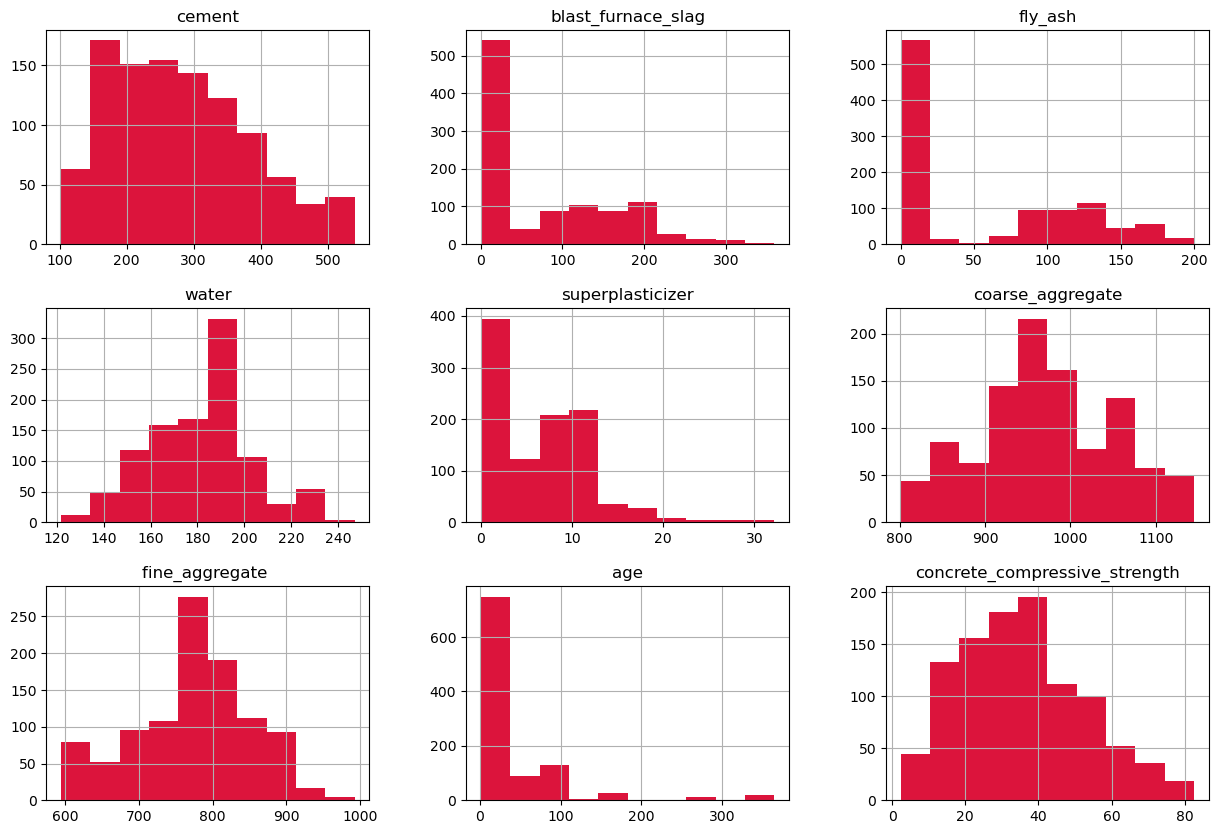

In [6]:
df.hist(figsize=(15,10),color='crimson')
plt.show()

too many values of fly_ash, superplasticizer and blast_furnance_slag are initialized to zero

<Axes: >

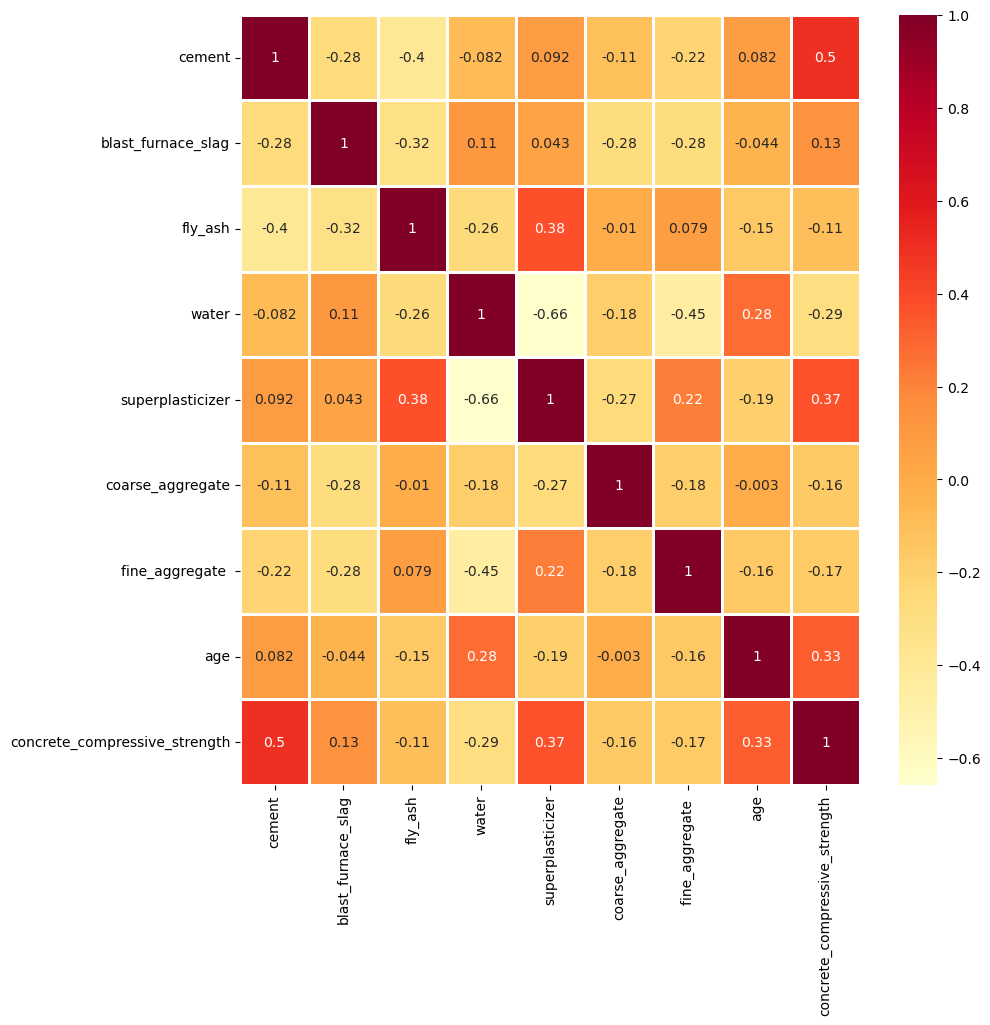

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,cmap='YlOrRd',annot=True)

<Axes: >

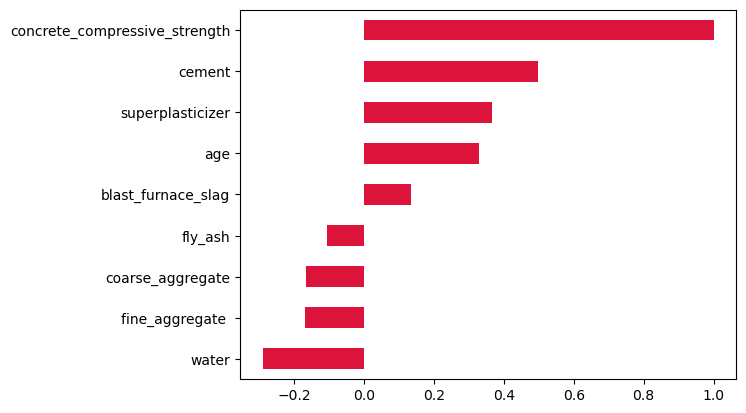

In [8]:
correlation=df.corr()['concrete_compressive_strength'].sort_values()
correlation.plot(kind='barh',color='crimson')

_cement and superplasticizer is positively correlated whereas water is negetively correlated_

In [9]:
#Finding number of values initialized to zero
for (colname,colval) in df.items():
    val = (colval == 0.0).sum()/len(df)*100
    print(colname, val)

cement 0.0
blast_furnace_slag 45.728155339805824
fly_ash 54.95145631067962
water 0.0
superplasticizer 36.79611650485437
coarse_aggregate 0.0
fine_aggregate  0.0
age 0.0
concrete_compressive_strength 0.0


In [10]:
# Mean with and without zero 
df.blast_furnace_slag.mean(), df.blast_furnace_slag.sum()/(len(df)-(df.blast_furnace_slag == 0.0).sum())

(73.89582524271846, 136.15867620751345)

In [11]:
col = ['blast_furnance_slag','fly_ash','superplasticizer']
before = [df.blast_furnace_slag.mean(),df.fly_ash.mean(),df.superplasticizer.mean()]
after = [df.blast_furnace_slag.sum()/(len(df)-(df.blast_furnace_slag == 0.0).sum()),df.fly_ash.sum()/(len(df)-(df.fly_ash == 0.0).sum()),df.superplasticizer.sum()/(len(df)-(df.superplasticizer == 0.0).sum())]

In [12]:
mean_df = pd.DataFrame(list(zip(col,before,after)), columns=['feature','mean_before','mean_after'])
mean_df

,feature,mean_before,mean_after
0,blast_furnance_slag,73.895825,136.158676
1,fly_ash,54.188350,120.288793
2,superplasticizer,6.204660,9.816897


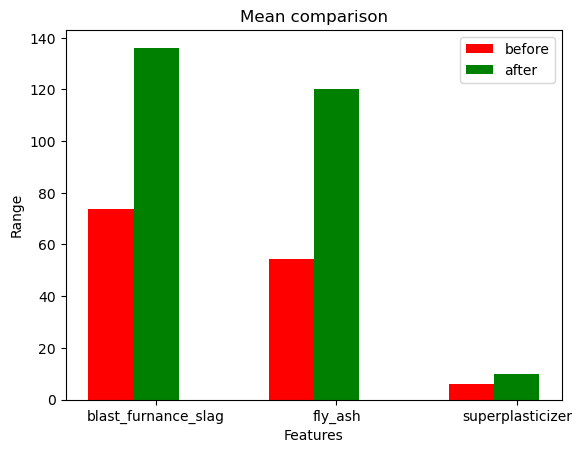

In [13]:
width = 0.25

ind = np.arange(len(mean_df))
xvals = mean_df.mean_before
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = mean_df.mean_after
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
plt.ylabel('Range')
plt.xlabel('Features')
plt.title("Mean comparison")
  
plt.xticks(ind+width,mean_df.feature)
plt.legend( (bar1, bar2), ('before', 'after') )
plt.show()

### Changing the values from zero to natural mean

In [14]:
df1 = df.copy()
df1.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [15]:
mean_blast_fur = df.blast_furnace_slag.sum()/(len(df)-(df.blast_furnace_slag == 0.0).sum())
mean_fly_ash = df.fly_ash.sum()/(len(df)-(df.fly_ash == 0.0).sum())
mean_superplasticizer = df.superplasticizer.sum()/(len(df)-(df.superplasticizer == 0.0).sum())

In [16]:
df1.blast_furnace_slag.replace(0.0,mean_blast_fur,inplace=True)
df1.fly_ash.replace(0.0,mean_fly_ash,inplace=True)
df1.superplasticizer.replace(0.0,mean_superplasticizer,inplace=True)

In [17]:
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,28,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,28,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,270,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,365,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,28,44.28
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,28,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,28,23.70
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,28,32.77


In [18]:
(df['blast_furnace_slag']. corr(df['concrete_compressive_strength']),
df1['blast_furnace_slag']. corr(df1['concrete_compressive_strength']))

(0.13482926149740498, -0.07704071174496709)

In [19]:
(df['fly_ash']. corr(df['concrete_compressive_strength']),
df1['fly_ash']. corr(df1['concrete_compressive_strength']))

(-0.10575491629731354, -0.13237830611105028)

In [20]:
(df['superplasticizer']. corr(df['concrete_compressive_strength']),
df1['superplasticizer']. corr(df1['concrete_compressive_strength']))

(0.36607882718851936, 0.22614181674841552)

In [21]:
col = ['blast_furnance_slag','fly_ash','superplasticizer']
corr_before = [df['blast_furnace_slag']. corr(df['concrete_compressive_strength']),df['fly_ash']. corr(df['concrete_compressive_strength']),df['superplasticizer']. corr(df['concrete_compressive_strength'])]
corr_after = [df1['blast_furnace_slag']. corr(df1['concrete_compressive_strength']),df1['fly_ash']. corr(df1['concrete_compressive_strength']),df1['superplasticizer']. corr(df1['concrete_compressive_strength'])]

In [22]:
corr_comp_df = pd.DataFrame(list(zip(col,corr_before,corr_after)),columns=['features','corr_before','corr_after'])
corr_comp_df

,features,corr_before,corr_after
0,blast_furnance_slag,0.134829,-0.077041
1,fly_ash,-0.105755,-0.132378
2,superplasticizer,0.366079,0.226142


correlation of only fly_ash increased so we'll keep rest of the dataset same and change 0's of fly_ash to it's mean

In [23]:
df2 = df.copy()
df2.fly_ash.replace(0.0,mean_fly_ash,inplace=True)
df2.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,120.288793,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,120.288793,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,120.288793,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,120.288793,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,120.288793,192.0,0.0,978.4,825.5,360,44.30


### Model Selection

In [24]:
x = df2.drop('concrete_compressive_strength',axis=1)
y = df2.concrete_compressive_strength

In [25]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.856888,-6.294115e-16,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-6.294115e-16,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-6.294115e-16,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-6.294115e-16,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-6.294115e-16,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,-1.328230e+00,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,-2.076708e-01,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,-5.177071e-01,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-6.294115e-16,-0.279579,0.853356,0.214641,0.191166,-0.279733


In [26]:
#Splitting data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
sgd = SGDRegressor()
ls = Lasso()
els = ElasticNet()
ridge = Ridge()
svm = SVR()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
etr = ExtraTreesRegressor()
knr = KNeighborsRegressor()

In [29]:
algo = [sgd,ls,els,ridge,svm,rfr,ada,etr,knr]

In [30]:
model = []
accuracy_train = []
accuracy_test = []
for i in range(len(algo)):
    mod = algo[i].fit(x_train,y_train)
    accuracy_train.append(mod.score(x_train,y_train))
    accuracy_test.append(mod.score(x_test,y_test))
    model.append(algo[i])

In [31]:
model_df = pd.DataFrame(list(zip(model,accuracy_train,accuracy_test)),columns=['Model','Train_accuracy','Test_accuracy'])
model_df

,Model,Train_accuracy,Test_accuracy
0,SGDRegressor(),0.599602,0.606649
1,Lasso(),0.567251,0.563558
2,ElasticNet(),0.503067,0.522418
3,Ridge(),0.599801,0.612034
4,SVR(),0.666537,0.663702
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.986145,0.879410
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.827016,0.759540
7,"(ExtraTreeRegressor(random_state=172260128), E...",0.996939,0.888787
8,KNeighborsRegressor(),0.815113,0.711526


_Extra Tree Regressor gives us maximum accuracy_

### Model Building

In [32]:
etr1 = ExtraTreesRegressor()

In [33]:
rg = []
score = []
for i in range(1,200,1):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    etr1.fit(x_train,y_train)
    score.append(etr1.score(x_test,y_test))
    rg.append(i)

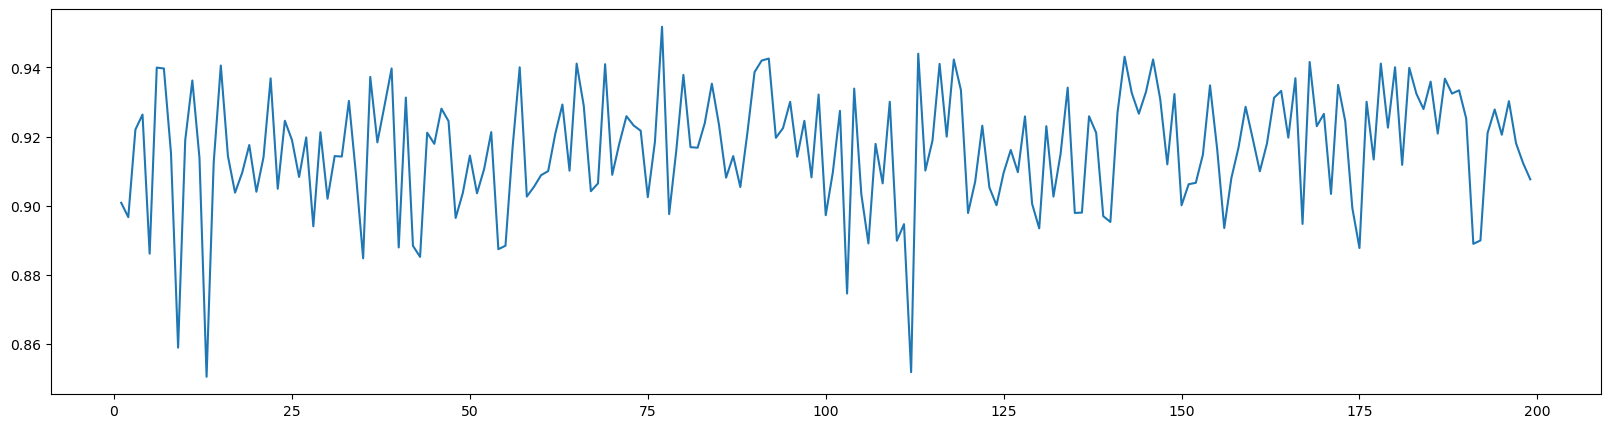

In [52]:
plt.figure(figsize=(20,5))
plt.plot(rg,score)

In [35]:
max_score = max(score)
max_score

0.9517676102510856

In [36]:
score.index(max_score)

76

In [37]:
rg[76]

77

In [38]:
for i in range(len(score)):
    print(rg[i],score[i])

1 0.9008949676259566
2 0.8967284541180934
3 0.9220487042165333
4 0.9263826369509877
5 0.8861802149885318
6 0.9399637358033063
7 0.9397119118650715
8 0.9152135007715019
9 0.8590075873586659
10 0.9189778709329617
11 0.9362394435412774
12 0.9138762312367446
13 0.8505882079646647
14 0.9124878879794508
15 0.9405568786082893
16 0.9143983267014196
17 0.9038150467504027
18 0.9095566833184867
19 0.9175849193544526
20 0.9040738580507599
21 0.91405017071441
22 0.9368517534371399
23 0.904939970264728
24 0.9245956184557915
25 0.9190372595864391
26 0.9083490431487102
27 0.9197818382210962
28 0.8940788981233907
29 0.9212773655511872
30 0.9020600109091126
31 0.9143959155246764
32 0.9142456633854334
33 0.9303296072089828
34 0.9088908547683822
35 0.8848266250057186
36 0.9372710769427602
37 0.9183596495355005
38 0.9289472469230831
39 0.9397223888134272
40 0.8879752975978412
41 0.9313044025643811
42 0.8884447317868693
43 0.8852502106962027
44 0.9211381215642296
45 0.9179346345448411
46 0.9281085437718439


so, at random state = 77, we get maximum accuracy

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=77)

In [40]:
etr1.fit(x_train,y_train)
etr1.score(x_test,y_test),etr1.score(x_train,y_train)

(0.947631196672472, 0.9950303996417782)

In [41]:
y_pred = etr1.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
rmsq = np.sqrt(mean_squared_error(y_test,y_pred))
rmsq

3.912165668183741

a root mean square error of 3.8 shows that our model is good

In [44]:
etr_grid = {'n_estimators': np.arange(0,1000,10),
           'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson', 'mean_absolute_error'],
           'max_features': ['sqrt', 'log2', 1.0, np.arange(0,1,0.1)],
           'n_jobs': [-1]}

In [53]:
# gs_etr = GridSearchCV(ExtraTreesRegressor(),
#                      param_grid=etr_grid,
#                      cv=5,
#                      verbose=True)
# gs_etr.fit(x_train,y_train)

rs_etr = RandomizedSearchCV(ExtraTreesRegressor(),
                           param_distributions=etr_grid,
                           cv=5,
                           verbose=True)
rs_etr.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/sklearn/base.

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse', 'poisson',
                                                      'mean_absolute_error'],
                                        'max_features': ['sqrt', 'log2', 1.0,
                                                         array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])],
                                        'n_estimators': array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
       910, 920, 930, 940, 950, 960, 970, 980, 990]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [54]:
rs_etr.score(x_test,y_test)

0.9522618699797645

In [55]:
rs_etr.best_params_

{'n_jobs': -1,
 'n_estimators': 100,
 'max_features': 1.0,
 'criterion': 'poisson'}

In [ ]:
# gs_etr.score(x_test,y_test)

In [ ]:
# gs_etr.best_params_